In [ ]:
#Red Neuronal Simple que busca separar dos nubes de puntos con Tensorflow

In [13]:
import numpy as np  
import scipy as sc
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

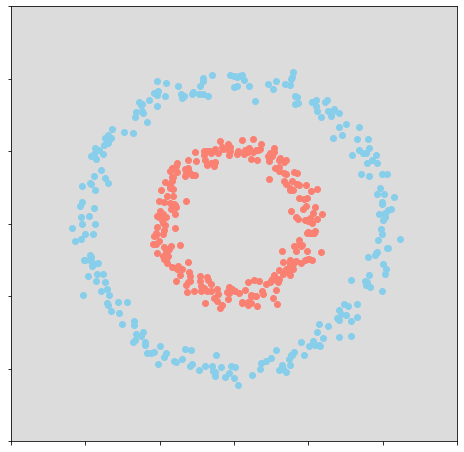

In [11]:
X,Y = make_circles(500,factor=0.5,noise=0.05)

_x0 = np.linspace(-1.5,1.5,100)
_x1 = np.linspace(-1.5,1.5,100)

_pX = np.array(np.meshgrid(_x0,_x1)).T.reshape(-1,2)
_pY = np.zeros((100,100)) + 0.5

plt.figure(figsize=(8,8))
plt.pcolormesh(_x0,_x1,_pY,cmap="coolwarm",vmin=0,vmax=1)

plt.scatter(X[Y==0,0],X[Y==0,1],c="skyblue")
plt.scatter(X[Y==1,0],X[Y==1,1],c="salmon")

plt.tick_params(labelbottom=False,labelleft=False)


In [14]:
tf.disable_v2_behavior()

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


Instructions for updating:
non-resource variables are not supported in the long term


In [15]:

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

    #Funcion de activacion
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))


In [17]:

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

    #Funcion de activacion
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))


In [18]:

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

In [20]:
###Entenamiento


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((100,100))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)
      
  

Step 0 / 1000 - Loss =  0.37522542 - Acc = 0.5
Step 25 / 1000 - Loss =  0.3058047 - Acc = 0.5
Step 50 / 1000 - Loss =  0.26362067 - Acc = 0.5
Step 75 / 1000 - Loss =  0.24213068 - Acc = 0.5
Step 100 / 1000 - Loss =  0.22932489 - Acc = 0.5
Step 125 / 1000 - Loss =  0.21966934 - Acc = 0.636
Step 150 / 1000 - Loss =  0.21145022 - Acc = 0.678
Step 175 / 1000 - Loss =  0.20439443 - Acc = 0.718
Step 200 / 1000 - Loss =  0.19802354 - Acc = 0.76
Step 225 / 1000 - Loss =  0.19190332 - Acc = 0.806
Step 250 / 1000 - Loss =  0.18590117 - Acc = 0.86
Step 275 / 1000 - Loss =  0.18006536 - Acc = 0.9
Step 300 / 1000 - Loss =  0.174278 - Acc = 0.928
Step 325 / 1000 - Loss =  0.16836429 - Acc = 0.938
Step 350 / 1000 - Loss =  0.16251066 - Acc = 0.944
Step 375 / 1000 - Loss =  0.15669845 - Acc = 0.944
Step 400 / 1000 - Loss =  0.15092267 - Acc = 0.948
Step 425 / 1000 - Loss =  0.14514874 - Acc = 0.95
Step 450 / 1000 - Loss =  0.13938439 - Acc = 0.95
Step 475 / 1000 - Loss =  0.13358743 - Acc = 0.952
Step

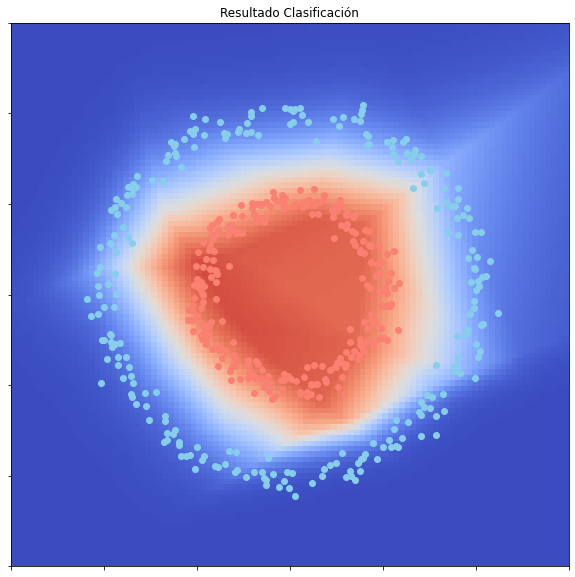

In [22]:
fig = plt.figure(figsize=(10, 10))
for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", vmin=0,vmax=1)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)


plt.title("Resultado Clasificación")
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()